<a href="https://colab.research.google.com/github/bomiiisong/MachineLearning-with-Python/blob/master/House_Price_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kaggle House Price
https://www.kaggle.com/c/house-prices-advanced-regression-techniques
<br>
<br>
* 'y' -> 'SalePrice'
* Mertic : 'RMSE'

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Data Load
* 'Kaggle_House_Price.csv' Github에서 읽어오기

In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/rusita-ai/pyData/master/Kaggle_House_Price.csv'
DF = pd.read_csv(url)

DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
DF.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# I. Data Preprocessing

> ## 1) 결측치 확인



In [ ]:
DF.shape

(1460, 81)

In [ ]:
isnull_series = DF.isnull().sum()

isnull_series[isnull_series > 0].sort_values(ascending = False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

> ## 2) Drop Columns

* 결측치가 많은 컬럼 제거

In [ ]:
DF.drop(['Id', 'PoolQC' , 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'],
         axis = 1,
         inplace = True)

* '숫자형' Null 컬럼 평균값 대체

In [ ]:
DF.fillna(DF.mean(),inplace = True)

In [ ]:
null_column_count = DF.isnull().sum()[DF.isnull().sum() > 0]
DF.dtypes[null_column_count.index]

MasVnrType      object
BsmtQual        object
BsmtCond        object
BsmtExposure    object
BsmtFinType1    object
BsmtFinType2    object
Electrical      object
GarageType      object
GarageFinish    object
GarageQual      object
GarageCond      object
dtype: object

> ## 3) Encoding

* get_dummies( )

In [ ]:
print('get_dummies() 수행 전 데이터 Shape:', DF.shape)
DF_OHE = pd.get_dummies(DF)
print('get_dummies() 수행 후 데이터 Shape:', DF_OHE.shape)

get_dummies() 수행 전 데이터 Shape: (1460, 75)
get_dummies() 수행 후 데이터 Shape: (1460, 271)


* 처리 결과 확인

In [ ]:
DF_OHE.isnull().sum()

MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
OverallCond              0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 271, dtype: int64

> ## 4) 'SalePrice' 분포

* 정규분포 형태가 아님

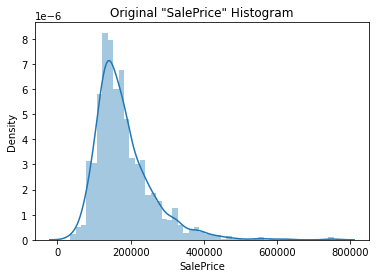

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.title('Original "SalePrice" Histogram')
sns.distplot(DF_OHE['SalePrice'])
plt.show()

* Log Transformed
 - 정규분포 형태 변환

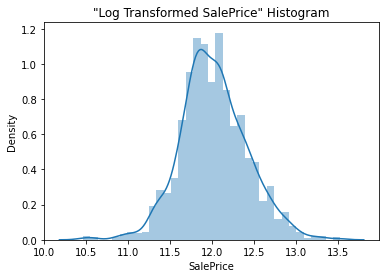

In [ ]:
import numpy as np

plt.title('"Log Transformed SalePrice" Histogram')
log_SalePrice = np.log1p(DF_OHE['SalePrice'])
sns.distplot(log_SalePrice)

* 적용

In [ ]:
# original_SalePrice = DF_OHE['SalePrice']

DF_OHE['SalePrice'] = np.log1p(DF_OHE['SalePrice'])

* Log 변환

In [ ]:
np.log1p(40000)

10.596659732783579

* 복원

In [ ]:
np.expm1(np.log1p(40000))

40000.0

> ## 5) train_test_split( )

In [ ]:
from sklearn.model_selection import train_test_split

X = DF_OHE.drop('SalePrice',
                axis = 1,
                inplace = False)
y = DF_OHE['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state = 2045)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1022, 270), (1022,), (438, 270), (438,))

# II. EDA

* 변수의 개수가 너무 많아, Tree 모델의 feature importance 먼저 진행

In [ ]:
# RandomForest feature importance

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

rf_fi = pd.DataFrame(data={'columns':X.columns,'feature_importance':rf.feature_importances_})
rf_fi = rf_fi.sort_values(by='feature_importance',ascending=False).reset_index().drop('index',axis=1)

fi = rf_fi[rf_fi['feature_importance']>0.001]

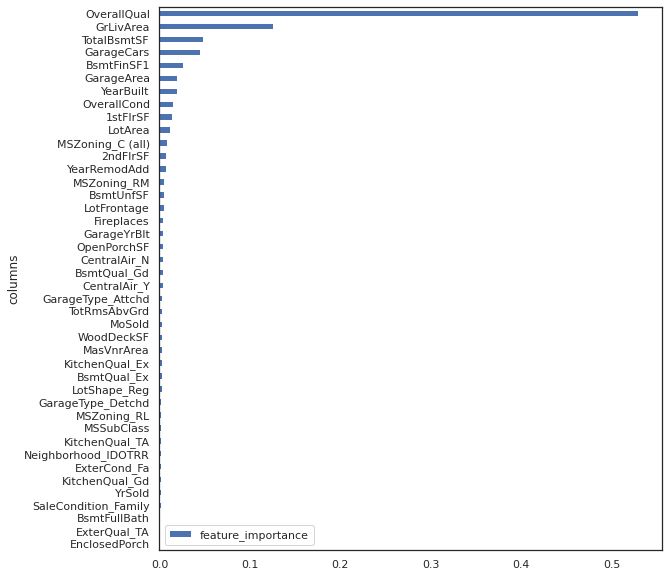

In [ ]:
sns.set_style("white")
ax = fi.plot.barh(x='columns',y='feature_importance',figsize=(9,10))
plt.gca().invert_yaxis()

In [ ]:
fi_10 = rf_fi[:10]
cols = list(fi_10['columns'])
cols_5 = cols[:5]
cols_5.append('SalePrice')

['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars', 'BsmtFinSF1']

In [ ]:
cols_10 = cols[6:]
cols_10.append('SalePrice')


## 변수 설명

*   OverallQual: Overall material and finish quality

*   OverallCond: Overall condition rating
*   GrLivArea: Above grade (ground) living area square feet


*   TotalBsmtSF: Total square feet of basement area


*   GarageCars: Size of garage in car capacity
*   BsmtFinSF1: Type 1 finished square feet


*   MSZoning: The general zoning classification
*   2ndFlrSF: Second floor square feet







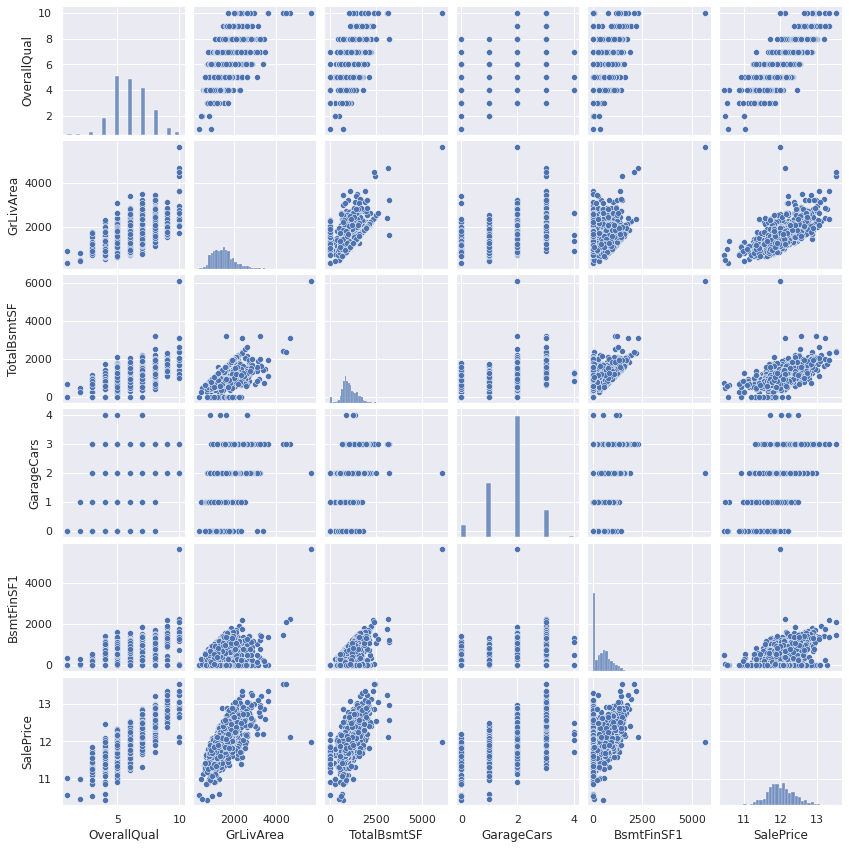

In [ ]:
#scatterplot (1)
sns.set()
sns.pairplot(DF_OHE[cols_5], size=2)
plt.show()

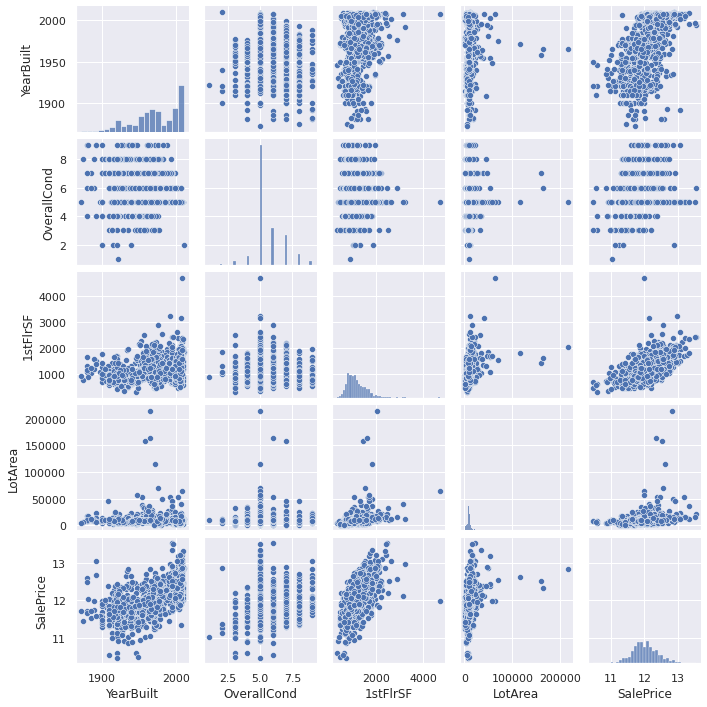

In [ ]:
sns.set()
sns.pairplot(DF_OHE[cols_10], size=2)
plt.show()

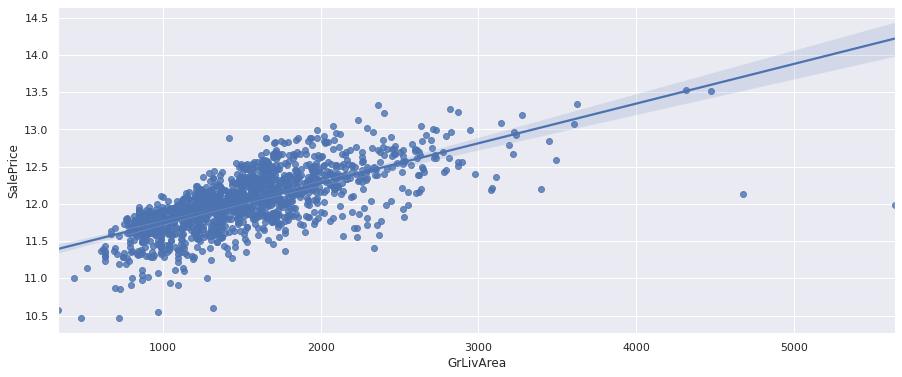

In [ ]:
fig = plt.figure(figsize=(15,6))
sns.regplot(x='GrLivArea', y='SalePrice', data=DF_OHE)
plt.show()

* 'SalePrice' 와 'GrLivArea' : 양의 상관관계를 보임



# III. Modeling

In [ ]:
def modeling(models, model_name):
    for idx, model in enumerate(models):
        model.fit(X_train,y_train)
        pred = model.predict(X_test)
        # 평가
        mse = mean_squared_error(y_test, pred)
        RMSE = np.sqrt(mse)
        name = model_name[idx] + '_' + str(len(X.columns))
        capacity.append((name, RMSE))
    return capacity

## 1) feture importance 상위 3개 [OverallQual, GrLivArea, TotalBsmtSF]


In [ ]:
X = DF_OHE[['OverallQual', 'GrLivArea', 'TotalBsmtSF']]
y = DF_OHE['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state = 2045)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Train Data :  (1022, 3) (1022,)
Test Data :  (438, 3) (438,)


In [ ]:
lr = LinearRegression()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()
xgb = XGBRegressor()

In [ ]:
models = [lr, dtr, rfr, xgb]
model_name = ['LinearRegression', 'DecisionTree_Regressor', 'RandomForest_Regressor', 'XGB_Regressor']
capacoity = []

modeling(models, model_name)

[06:57:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
capacity

[('LinearRegression_3', 0.17751706285565091),
 ('DecisionTree_Regressor_3', 0.2466401070586139),
 ('RandomForest_Regressor_3', 0.19052393701985484),
 ('XGB_Regressor_3', 0.1755320729990053)]

## 2) feture importance 상위 5개 [OverallQual, GrLivArea, TotalBsmtSF, GarageCars, BsmtFinSF1]

In [ ]:
X = DF_OHE[['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars', 'BsmtFinSF1']]
y = DF_OHE['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state = 2045)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Train Data :  (1022, 5) (1022,)
Test Data :  (438, 5) (438,)


In [ ]:
modeling(models, model_name)
capacity

[('LinearRegression_3', 0.17751706285565091), ('DecisionTree_Regressor_3', 0.2389551251280952), ('RandomForest_Regressor_3', 0.19376259635648443), ('XGB_Regressor_3', 0.1755320729990053), ('DecisionTree_Regressor_5', 0.21532634375432785), ('RandomForest_Regressor_5', 0.1634289593415864), ('XGB_Regressor_5', 0.15667206733549538), ('LinearRegression_5', 0.15591909561273443)]


## 3) feture importance 상위 10개

In [ ]:
col = list(rf_fi['columns'][:10])

In [ ]:
X = DF_OHE[col]
y = DF_OHE['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state = 2045)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Train Data :  (1022, 10) (1022,)
Test Data :  (438, 10) (438,)


In [ ]:
modeling(models, model_name)
capacity

[07:04:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[('LinearRegression_3', 0.17751706285565091), ('DecisionTree_Regressor_3', 0.2389551251280952), ('RandomForest_Regressor_3', 0.19376259635648443), ('XGB_Regressor_3', 0.1755320729990053), ('DecisionTree_Regressor_5', 0.21532634375432785), ('RandomForest_Regressor_5', 0.1634289593415864), ('XGB_Regressor_5', 0.15667206733549538), ('LinearRegression_5', 0.15591909561273443), ('LinearRegression_10', 0.1374039735798636), ('DecisionTree_Regressor_10', 0.19514082570427949), ('RandomForest_Regressor_10', 0.13949644214400952), ('XGB_Regressor_10', 0.13547154708795534)]


* 모델 별/변수 별 성능 시각화

In [ ]:
result = pd.DataFrame(data=capacity, columns=['Model', 'RMSE'])
result.sort_values(by=['RMSE'], ascending=True, inplace=True)

Text(0, 0.5, 'RMSE')

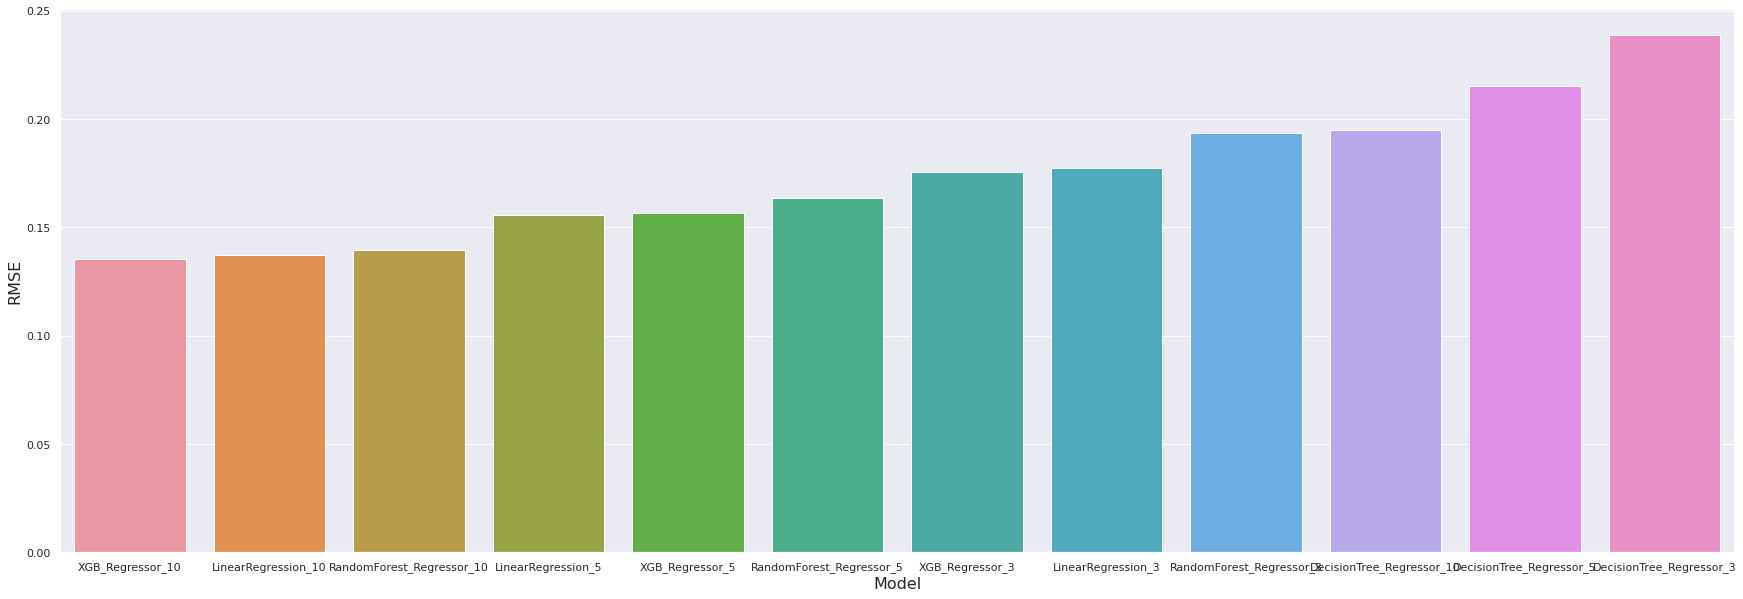

In [ ]:
f, axe = plt.subplots(1,1, figsize=(30,10))
sns.barplot(x='Model', y='RMSE', data=result, ax = axe)
axe.set_xlabel('Model', size=16)
axe.set_ylabel('RMSE', size=16)

# IV. Model_Tuning

* RandomForestRegressor
* XGBoostRegressor

In [ ]:
rf_params = {'n_estimators' : [500, 1000, 1500, 2000],
          'max_features' : [3, 4, 5, 6],
          'max_depth' : [10, 20, 30, 40],
          'random_state' : [2045]}

In [ ]:
xgb_params = {
        'n_estimators':[100,500,1000,2000],
        'learning_rate': [0.1, 0.5, 0.9],
        'max_depth': [3, 10, 20]
        }

In [ ]:
rf_cv = GridSearchCV(RFR, param_grid=rf_params, scoring='neg_mean_squared_error',
                       cv=KFold(n_splits=5, random_state=2045),
                       refit=True, n_jobs=-1)

In [ ]:
rf_cv.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=2045, shuffle=False),
             error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=1,
                                             max_features=3,
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=1000, n_jobs=-1,
                                             oob_score=False, random_state=2045,
                                             verbose=0, 

In [ ]:
print(rf_cv.best_score_)
print(rf_cv.best_params_)

-0.02157473605019692
{'max_depth': 20, 'max_features': 5, 'n_estimators': 1000, 'random_state': 2045}


In [ ]:
RF_cv = rf_cv.best_estimator_

y_hat_rfcv = RF_cv.predict(X_test)

RMSE_rfcv = np.sqrt(mean_squared_error(y_test, y_hat_rfcv))

print('Final RMSE : ', RMSE_rfcv)

Final RMSE :  0.13514202422413718


In [ ]:
from sklearn.model_selection import GridSearchCV, KFold

grid_cv = GridSearchCV(XGB, param_grid=xgb_params, scoring='neg_mean_squared_error',
                       cv=KFold(n_splits=5, random_state=2045),
                       refit=True, n_jobs=-1)

In [ ]:
grid_cv.fit(X_train, y_train)

[07:09:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=KFold(n_splits=5, random_state=2045, shuffle=False),
             error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gblinear',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.9,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=-1, nthread=None,
                                    obj...reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=2.0,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.5, 0.9],
            

In [ ]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-0.03939968431431504
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}


In [ ]:
XGB_cv = grid_cv.best_estimator_

y_hat_cv = XGB_cv.predict(X_test)

RMSE_cv = np.sqrt(mean_squared_error(y_test, y_hat_cv))

print('Final RMSE : ', RMSE_cv)

Final RMSE :  0.14388974216821376


In [ ]:
result.loc[12] = ['RandomForest_CV', RMSE_rfcv]
result.loc[13] = ['XGB_CV', RMSE_cv]

* RMSE 낮은 상위 5개 모델 추출

In [ ]:
result.sort_values(by=['RMSE'], ascending=True, inplace=True)
top_5 = result[:5] 

Text(0, 0.5, 'RMSE')

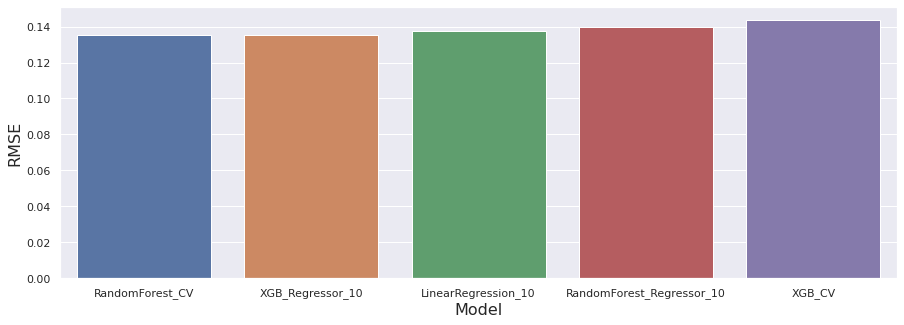

In [ ]:
f, axe = plt.subplots(1,1, figsize=(15,5))
sns.barplot(x='Model', y='RMSE', data=top_5, ax = axe)
axe.set_xlabel('Model', size=16)
axe.set_ylabel('RMSE', size=16)

In [ ]:
col

['OverallQual',
 'GrLivArea',
 'TotalBsmtSF',
 'GarageCars',
 'BsmtFinSF1',
 'GarageArea',
 'YearBuilt',
 'OverallCond',
 '1stFlrSF',
 'LotArea']

# V. 최종 정리

* **최종 모델 : RandomForest** <br>
* 최종 하이퍼파라미터 : <br>
    * max_depth': 20<br>
    * max_features: 5 <br>
    * n_estimators': 1000
<br>
<br>
1.  결과 설명 <br>
 총  81개 변수 중, 학습에 영향을 주는 변수를 빠르게 추출하기  위해 Tree 모델의 feature importance를 먼저 진행하였습니다. 그 결과, 0.1% 이상의 중요도를 가진 변수 10개가 선정되었습니다. 변수의 개수를 조정하며 학습한 결과, 중요도 높은 10개 변수를 모두 사용했을 때의 RMSE 값 **0.1351**로 가장 낮은 오류율을 보인 RandomForest 모델을 최종적으로 선택하였습니다.  

2.  집값(SalePrice)에 영향을 주는 변수

    1) 집의 최종 마감 상태(OverallQual)의 퀄리티가 높을수록, 집값이 높아지는 경향을 보임
    2) 면적이 커질수록, 집값이 높아지는 경향을 보임
    3) 차고의 용량이 클수록 집값이 높아지는 경향을 보임



# 
# 
# 
# The End
# 
# 
# 